<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-164.187208,39.714486,123.688225,-83.973739
1,0.0,1.0,79.278513,73.611907,35.879667,365.597156,564.367243,261.892671,302.474572
2,0.0,2.0,89.458052,81.226335,43.234374,78.289731,302.208492,282.339412,19.869080
3,0.0,3.0,22.100758,96.049180,73.842106,-322.416244,-120.424200,181.796721,-302.220921
4,0.0,4.0,90.533637,67.361013,34.370402,-249.631801,-47.366750,267.739061,-315.105811
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-72.626707,107.668425,181.200178,-73.531753
29996,999.0,26.0,95.432322,26.200930,86.304349,9.797548,227.735150,210.765967,16.969183
29997,999.0,27.0,42.790320,46.915556,39.261788,-40.240400,98.727264,110.111252,-11.383988
29998,999.0,28.0,55.499214,36.665307,60.157215,-169.971981,-7.650245,136.627991,-144.278236


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-164.187208,39.714486,123.688225,-83.973739
1,0.0,1.0,79.278513,73.611907,35.879667,365.597156,564.367243,261.892671,302.474572
2,0.0,2.0,89.458052,81.226335,43.234374,78.289731,302.208492,282.339412,19.869080
3,0.0,3.0,22.100758,96.049180,73.842106,-322.416244,-120.424200,181.796721,-302.220921
4,0.0,4.0,90.533637,67.361013,34.370402,-249.631801,-47.366750,267.739061,-315.105811
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-72.626707,107.668425,181.200178,-73.531753
29996,999.0,26.0,95.432322,26.200930,86.304349,9.797548,227.735150,210.765967,16.969183
29997,999.0,27.0,42.790320,46.915556,39.261788,-40.240400,98.727264,110.111252,-11.383988
29998,999.0,28.0,55.499214,36.665307,60.157215,-169.971981,-7.650245,136.627991,-144.278236


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    54.266279  49.846687  ...  123.688225  -83.973739
      1.0    79.278513  73.611907  ...  261.892671  302.474572
      2.0    89.458052  81.226335  ...  282.339412   19.869080
      3.0    22.100758  96.049180  ...  181.796721 -302.220921
      4.0    90.533637  67.361013  ...  267.739061 -315.105811
...                ...        ...  ...         ...         ...
999.0 25.0   55.512881  67.767928  ...  181.200178  -73.531753
      26.0   95.432322  26.200930  ...  210.765967   16.969183
      27.0   42.790320  46.915556  ...  110.111252  -11.383988
      28.0   55.499214  36.665307  ...  136.627991 -144.278236
      29.0   48.461510  33.375414  ...   89.019529    2.361028

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    54.266279  49.846687  ...  123.688225  -83.973739
      1.0    79.278513  73.611907  ...  261.892671  302.474572
      2.0    89.458052  81.226335  ...  282.339412   19.869080
      3.0    22.100758  96.049180  ...  181.796721 -302.220921
      4.0    90.533637  67.361013  ...  267.739061 -315.105811
...                ...        ...  ...         ...         ...
999.0 25.0   55.512881  67.767928  ...  181.200178  -73.531753
      26.0   95.432322  26.200930  ...  210.765967   16.969183
      27.0   42.790320  46.915556  ...  110.111252  -11.383988
      28.0   55.499214  36.665307  ...  136.627991 -144.278236
      29.0   48.461510  33.375414  ...   89.019529    2.361028

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-164.187208,39.714486,123.688225,-83.973739
1,0.0,1.0,79.278513,73.611907,35.879667,365.597156,564.367243,261.892671,302.474572
2,0.0,2.0,89.458052,81.226335,43.234374,78.289731,302.208492,282.339412,19.869080
3,0.0,3.0,22.100758,96.049180,73.842106,-322.416244,-120.424200,181.796721,-302.220921
4,0.0,4.0,90.533637,67.361013,34.370402,-249.631801,-47.366750,267.739061,-315.105811
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-72.626707,107.668425,181.200178,-73.531753
29996,999.0,26.0,95.432322,26.200930,86.304349,9.797548,227.735150,210.765967,16.969183
29997,999.0,27.0,42.790320,46.915556,39.261788,-40.240400,98.727264,110.111252,-11.383988
29998,999.0,28.0,55.499214,36.665307,60.157215,-169.971981,-7.650245,136.627991,-144.278236


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    54.266279  49.846687  ...  123.688225  -83.973739
      1.0    79.278513  73.611907  ...  261.892671  302.474572
      2.0    89.458052  81.226335  ...  282.339412   19.869080
      3.0    22.100758  96.049180  ...  181.796721 -302.220921
      4.0    90.533637  67.361013  ...  267.739061 -315.105811
...                ...        ...  ...         ...         ...
999.0 25.0   55.512881  67.767928  ...  181.200178  -73.531753
      26.0   95.432322  26.200930  ...  210.765967   16.969183
      27.0   42.790320  46.915556  ...  110.111252  -11.383988
      28.0   55.499214  36.665307  ...  136.627991 -144.278236
      29.0   48.461510  33.375414  ...   89.019529    2.361028

[30000 rows x 7 columns]

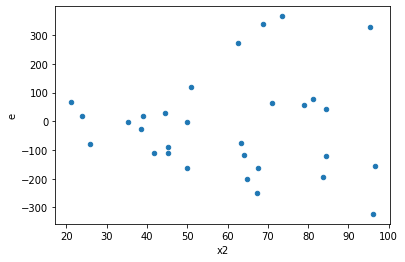

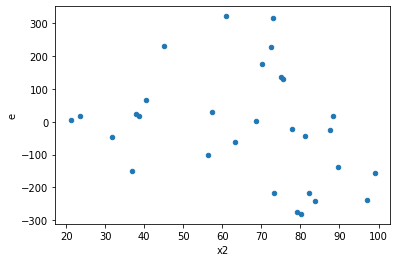

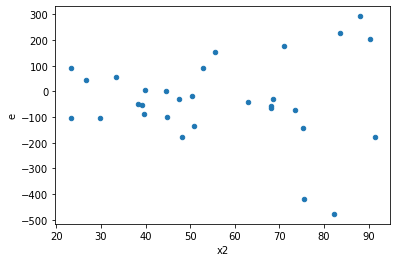

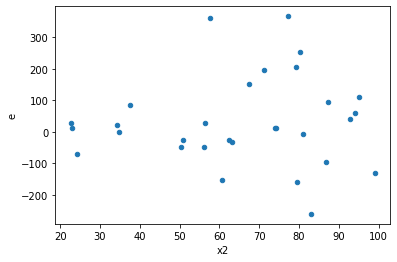

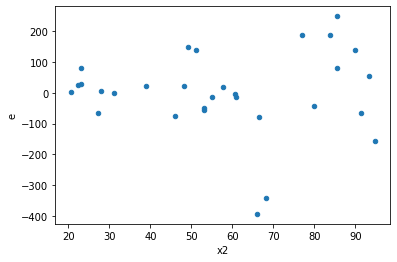

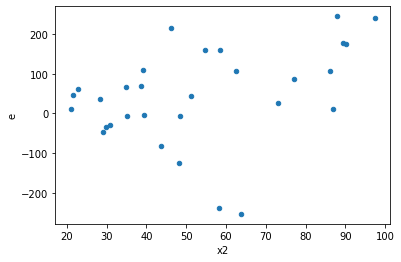

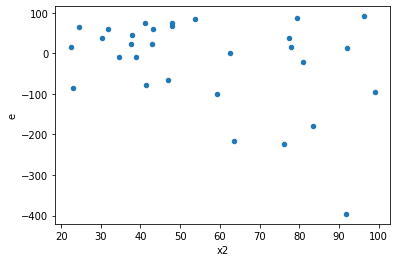

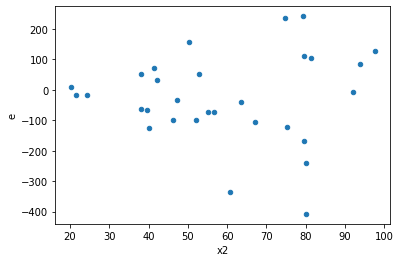

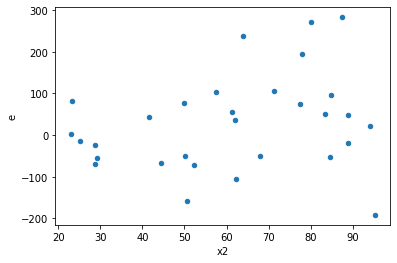

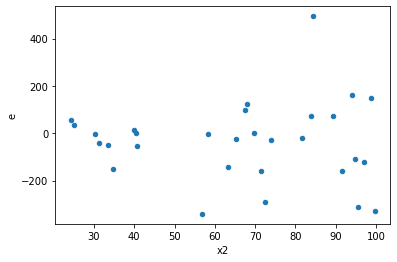

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,378132.9706400267,26089.499529429562,47266.621330003334,3261.1874411786953,14.493684335089828,0.0004831592937293294,0.9997584203531353,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,178823.94242360385,138676.51556868255,22352.99280295048,17334.56444608532,1.2895041506507812,0.7110278714779252,0.6444860642610374,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,519446.3586951274,44176.86624886736,64930.79483689093,5522.10828110842,11.758334232420694,0.001110553096053346,0.9994447234519733,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,275066.6008845857,90443.83988297572,34383.32511057321,11305.479985371965,3.041297243023862,0.11301232835176234,0.9434938358241188,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,205450.4034823532,41275.05154484161,25681.30043529415,5159.3814431052015,4.977592899166944,0.02544467410241813,0.9872776629487909,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,106030.72408251885,20959.58414741509,13253.840510314856,2619.9480184268864,5.0588181204728455,0.024121068974039872,0.9879394655129801,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,247214.35159448456,24480.30300740768,30901.79394931057,3060.03787592596,10.098500476880456,0.0020061931969279634,0.998996903401536,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,334346.41594499355,66037.78720674063,41793.301993124194,8254.723400842578,5.062956075409899,0.024055903805408008,0.987972048097296,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,122776.59600662452,42883.40155567892,15347.074500828065,5360.425194459865,2.86303305131273,0.13301501219707723,0.9334924939014614,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,378132.9706400267,26089.499529429562,47266.621330003334,3261.1874411786953,14.493684335089828,0.0004831592937293294,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,178823.94242360385,138676.51556868255,22352.99280295048,17334.56444608532,1.2895041506507812,1.2889721285220748,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,519446.3586951274,44176.86624886736,64930.79483689093,5522.10828110842,11.758334232420694,0.001110553096053346,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,275066.6008845857,90443.83988297572,34383.32511057321,11305.479985371965,3.041297243023862,0.11301232835176234,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,205450.4034823532,41275.05154484161,25681.30043529415,5159.3814431052015,4.977592899166944,0.02544467410241813,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,106030.72408251885,20959.58414741509,13253.840510314856,2619.9480184268864,5.0588181204728455,0.024121068974039872,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,247214.35159448456,24480.30300740768,30901.79394931057,3060.03787592596,10.098500476880456,0.0020061931969279634,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,334346.41594499355,66037.78720674063,41793.301993124194,8254.723400842578,5.062956075409899,0.024055903805408008,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,122776.59600662452,42883.40155567892,15347.074500828065,5360.425194459865,2.86303305131273,0.13301501219707723,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    507
Reject001=1 : Homoscedasticity      493
Name: Result_test, dtype: int64